# Algoritmos Populacionais

Algoritmos que utilizam um conjunto de soluções candidatas para o determinado problema.
O conjunto de soluções é chamado de população.

## Uma solução é tipicamente um vetor

Uma solução também é chamado de indivíduo. A solução possui o tamanho M.

$s = \begin{bmatrix}
1 & 1 & 0
\end{bmatrix}$

In [1]:
solucao = [ 0, 0, 0, 0]

## Um conjunto de soluções é tipicamente uma matriz

Cada linha da matriz é uma solução candidata. A matriz possui o tamanho NxM, onde N é a quantidade de soluções e M é o tamanho de cada solução.

$P = \begin{bmatrix}
0 & 0 & 0 \\ 
0 & 1 & 0 \\ 
0 & 1 & 1 \\  
1 & 1 & 0
\end{bmatrix}$

In [2]:
# Start writing code here...
conjunto_de_solucoes = [ [ 0, 0, 0, 0], [ 0, 0, 0, 0], [ 0, 0, 0, 0]]
for i in range(len(conjunto_de_solucoes)):
    solucao = conjunto_de_solucoes[i]
    print("Solução",i,"=", solucao)

Solução 0 = [0, 0, 0, 0]
Solução 1 = [0, 0, 0, 0]
Solução 2 = [0, 0, 0, 0]


## Cada solução é atribuído um valor de “fitness”

O valor de fitness ou aptidão define o qual bem a solução resolve o problema. Pode ser utilizado o valor calculado pela função objetivo. Tipicamente é utilizado uma matriz 1xN (matriz coluna), onde N é a quantidade de soluções candidatas.

$F = \begin{bmatrix}
0 \\ 
0 \\ 
0 \\ 
1
\end{bmatrix}$

In [3]:
fitness = [ [0],[0],[0]]
for i in range(len(fitness)):
    print("Fitness da Solução",i,"=", fitness[i])

Fitness da Solução 0 = [0]
Fitness da Solução 1 = [0]
Fitness da Solução 2 = [0]


## Algoritmos populacionais são algoritmos geracionais.

Uma geração representa um conjunto de soluções em um determinado período de tempo. Os algoritmos utilizam G gerações para manipular as soluções.

| $P_{g0} = \begin {bmatrix}0 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 1 & 1 \\  1 & 1 & 0\end{bmatrix}$ | $\rightarrow P_{g1} = \begin {bmatrix}0 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 1 & 1 \\  1 & 1 & 0\end{bmatrix}$ | $ \cdots \rightarrow P_{gmax} = \begin {bmatrix}0 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 1 & 1 \\  1 & 1 & 0\end{bmatrix}$ |
|--------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------|

| $F_{g0} = \begin {bmatrix}0 \\ 0 \\ 0 \\ 1\end{bmatrix}$ | $ \rightarrow F_{g1} = \begin {bmatrix}0 \\ 0 \\ 0 \\ 1\end{bmatrix}$ | $ \cdots \rightarrow F_{gmax} = \begin {bmatrix}0 \\ 0 \\ 0 \\ 1\end{bmatrix}$ |
|-----------------------------------------------------|-----------------------------------------------------|-----------------------------------------------------|

## População inicial

A população inicial é tipicamente gerada aleatoriamente e representa a geração 0. Todos indivíduos da população inicial devem ser avaliados.

## Criação da próxima geração

A geração $g_i+1$ é criada a partir das modificações das soluções da geração $g_i$.

## Elitismo

A melhor solução da geração $g_i$ pode ser incluída diretamente na próxima geração. Esta técnica evita perder a melhor solução encontrada durante o processo.

## Reprodução

De acordo com a estratégia do algoritmo, a reprodução de novos indivíduos podem ser realizados através de mutações, cruzamentos entre outros operadores. Estas operações podem envolver 1 ou mais indivíduos. Os novos indívuos gerados são adicionados na nova geração. Todos os indivíduos da geração anterior são descartados.

## Critério de parada

O algoritmo pode finalizar o processo de busca quando não for capaz gerar novas soluções por x gerações, quando atingir x avaliações de indivíduos entre outros.

## Pseudocódigo de um algoritmo populacional evolucionário

![](pseudocodigo.png)

# Problema da Mochila Binária

Dado uma mochila, quais objetos posso carregar afim de maximizar o meu lucro?

## Dados do Problema

In [4]:
lucro_dos_objetos = [24,13,23,15,16]
peso_dos_objetos = [12,7,11,8,9]
tamanho_da_mochila = 26
penalidade = 26

## Penalidade

O que deve ser feito com uma solução que ultrapassou o tamanho da mochila?

* Solução inválida - Fitness = 0
* Penalizo a solução = Desconto o valor do fitness
* Corrijo a solução - Retiro algum item da mochila

## Função Objetivo

In [5]:
def funcao_objetivo(solucao):
    fitness = 0
    peso = 0
    for i in range(len(solucao)):
        fitness = fitness + ( solucao[i] * lucro_dos_objetos[i])
        peso = peso + (solucao[i] * peso_dos_objetos[i])
    
    if(peso > tamanho_da_mochila):
        fitness = fitness - penalidade

    return fitness

# Desenvolvimento do Algoritmo Populacional

## Inicialização dos parametros

In [6]:
tamanho_da_solucao = len(lucro_dos_objetos)
tamanho_da_populacao = 6
quantidade_total_de_avaliacoes = 25
quantidade_atual_de_avaliacoes = 0
percentual_de_realizar_mutacao = 5 # 3% de chance de realizar a mutação
populacao = []
populacao_a = []
populacao_b = []
proxima_populacao = []
fitness = [0] * tamanho_da_populacao
fitness_proxima_populacao = [0] * (tamanho_da_populacao + 1)
indice_da_melhor_solucao = 0
indice_da_pior_solucao = 0

for i in range (tamanho_da_populacao):
    populacao.append([0] * tamanho_da_solucao)
    populacao_a.append([0] * tamanho_da_solucao)
    populacao_b.append([0] * tamanho_da_solucao)
    proxima_populacao.append([0] * tamanho_da_solucao)

proxima_populacao.append([0] * tamanho_da_solucao)


## Geração da população inicial

Gerar a população com a distribuição uniforme.

In [7]:
import random

ponto_de_corte = random.randint(0,tamanho_da_solucao-1)

def gerar_solucao_inicial():
    for i in range(tamanho_da_populacao):
        for j in range(tamanho_da_solucao):
            populacao_a[i][j] = random.randint(0, 1)
            populacao_b[i][j] = random.randint(0, 1)
            if i <= ponto_de_corte:
                    populacao.append(populacao_a[i][j])
            else:
                    populacao.append(populacao_b[i][j])





 


## Avaliação da população

In [8]:
def avaliar_solucao(indice):
    fitness[indice] = funcao_objetivo(populacao[indice])

def avaliar_populacao():
    for i in range(tamanho_da_populacao):
        avaliar_solucao(i)

## Identificar a melhor solução da população

In [9]:
def identificar_melhor_solucao():
    indice_da_melhor_solucao = 0
    for i in range(tamanho_da_populacao):
        if fitness[indice_da_melhor_solucao] < fitness[i]:
            indice_da_melhor_solucao = i
    return indice_da_melhor_solucao

## Elitismo

In [10]:
def elitismo():
    indice_da_melhor_solucao = identificar_melhor_solucao()
    proxima_populacao[tamanho_da_populacao] = populacao[indice_da_melhor_solucao]
    fitness_proxima_populacao[tamanho_da_populacao] = fitness[indice_da_melhor_solucao]

## Mutação

Realizar uma pequena modificação no indivíduo.

In [11]:
import random


def mutacao(indice):
    for i in range(tamanho_da_solucao):
        if random.randint(0, 100) <= percentual_de_realizar_mutacao:
            if populacao[indice][i] == 0:
                proxima_populacao[indice][i] = 1
            else:
                proxima_populacao[indice][i] = 0
        else:
            proxima_populacao[indice][i] = populacao[indice][i]

## Gerar nova geração

### Identificar a pior solução da  próxima população

Pior indivíduo da próxima geração é descartado.

In [12]:
def identificar_pior_solucao_da_proxima_populacao():
    indice_da_pior_solucao = 0
    for i in range(tamanho_da_populacao+1):
        if fitness_proxima_populacao[indice_da_pior_solucao] > fitness_proxima_populacao[i]:
            indice_da_pior_solucao = i
    return indice_da_pior_solucao

In [13]:
def identificar_pior_solucao_da_populacao_atual():
    indice_da_pior_solucao = 0
    for i in range(tamanho_da_populacao):
        if fitness[indice_da_pior_solucao] > fitness[i]:
            indice_da_pior_solucao = i
    return indice_da_pior_solucao


### Copia as soluções da nova geração

In [14]:
def gerar_proxima_populacao():
    pior = identificar_pior_solucao_da_proxima_populacao()
    del proxima_populacao[pior]
    del fitness_proxima_populacao[pior]

    populacao = proxima_populacao
    fitness = fitness_proxima_populacao

    proxima_populacao.append(proxima_populacao[0])
    fitness_proxima_populacao.append(fitness_proxima_populacao[0])

## Gerações

In [15]:
def criterio_de_parada_atingido(quantidade_atual_de_avaliacoes):
    return quantidade_atual_de_avaliacoes >= quantidade_total_de_avaliacoes

In [16]:
# listas para os relatórios

def relatorio_de_convergencia_da_geracao():
    melhor_fitness_da_geracao.append(fitness[identificar_melhor_solucao()])
    pior_fitness_da_geracao.append(fitness[identificar_pior_solucao_da_populacao_atual()])
    media = 0
    for i in fitness:
        media = media+i
    media_fitness_da_geracao.append(media/len(fitness))

In [19]:
melhor_fitness_da_geracao = []
media_fitness_da_geracao = []
pior_fitness_da_geracao = []

for i in range(30):
    gerar_solucao_inicial()
    avaliar_populacao()
    quantidade_atual_de_avaliacoes = tamanho_da_populacao
    relatorio_de_convergencia_da_geracao()
    contador = 0
    while not criterio_de_parada_atingido(quantidade_atual_de_avaliacoes):
        elitismo()
        for i in range(tamanho_da_populacao):
            tamanho_do_torneio = 3
            indice_da_solucao_a = random.randint(0,tamanho_da_populacao - 1)
            for i in range(tamanho_do_torneio - 1):
                indice_da_solucao_candidata = indice_da_solucao_a
                while ( indice_da_solucao_candidata ==  indice_da_solucao_a ) :
                    indice_da_solucao_candidata = random.randint(0,tamanho_da_populacao - 1)
               # print(fitness[indice_da_solucao_a])
                if fitness[indice_da_solucao_candidata] > fitness[indice_da_solucao_a]:
                    indice_da_solucao_a = indice_da_solucao_candidata
            mutacao(i)
            fitness_proxima_populacao[i] = funcao_objetivo(proxima_populacao[i])
            quantidade_atual_de_avaliacoes = quantidade_atual_de_avaliacoes + 1
        gerar_proxima_populacao()
        relatorio_de_convergencia_da_geracao()
        contador = contador + 1
    #print("Melhor individuo")
    melhor_final = identificar_melhor_solucao()
    #print(populacao[melhor_final])
    #print(fitness[melhor_final])
    print(fitness[indice_da_solucao_a])

0
0
16
13
0
0
0
0
0
0
0
0
0
24
16
0
0
0
0
0
0
24
0
23
0
0
0
0
0
0


## Relatórios

Convergência da população. Melhor, média e pior solução

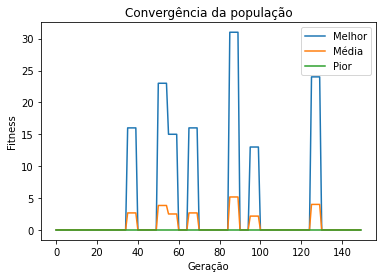

In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.axes()


plt.title("Convergência da população")
plt.xlabel("Geração")
plt.ylabel("Fitness")


ax.plot(melhor_fitness_da_geracao, label="Melhor")
ax.plot(media_fitness_da_geracao, label="Média")
ax.plot(pior_fitness_da_geracao, label="Pior")
ax.grid(False)
plt.legend();

## Melhor Solução encontrada

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4160b262-566c-48f6-bdfa-4004549cc6ab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>